
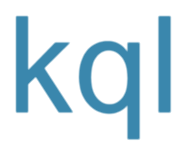

In [1]:
# load the KQLmagic module
%reload_ext Kqlmagic

In [2]:
# Connect to the Application Insights API
# %kql appinsights://appid='f662fc55-56e4-49d0-b54a-909a76d41a1a';appkey='obgtl5wsg8i7c1w85q488ei8jj1spomoh1wdealz'
%kql appinsights://appid='5320f363-af54-4d91-af03-2a0e4fee2dbd';appkey='yetjaorz5bo4ntbjwxuu7oc2q4vjt8hyn5fhj6u5'

In [3]:

# You can either use configuration file (INI file format) or set filters directly. 

# If you specify a config file, then variables set here takes precedence over manually set filter variables
# config file name and directory (full path)
configFile = "c:/tmp/notebook.ini"


# Add AAD tenant id and environment name here
aadTenantId = ""
environmentName = ""
extensionId = ""

# date filters for the analysis
# use YYYY-MM-DD format for the dates (ISO 8601)
startDate = "2021-6-10"
endDate = "2021-12-31"




# Do not edit this code section
import configparser
config = configparser.ConfigParser()

config.read(configFile)

if bool(config.defaults()):
    if config.has_option('DEFAULT', 'aadTenantId'):
        aadTenantId = config['DEFAULT']['aadTenantId']
    if config.has_option('DEFAULT', 'environmentName'):
        environmentName = config['DEFAULT']['environmentName']
    if config.has_option('DEFAULT', 'extensionId'):
        extensionId = config['DEFAULT']['extensionId']
    if config.has_option('DEFAULT', 'startDate'):    
        startDate = config['DEFAULT']['startDate']
    if config.has_option('DEFAULT', 'endDate'):
        endDate = config['DEFAULT']['endDate']

print("Using these parameters for the analysis:")
print("----------------------------------------")
print("aadTenantId         " + aadTenantId)
print("environmentName     " + environmentName)
print("extensionId         " + extensionId)
print("startDate           " + startDate)
print("endDate             " + endDate)

Using these parameters for the analysis:
----------------------------------------
aadTenantId         
environmentName     
extensionId         
startDate           2021-6-10
endDate             2021-12-31


In [4]:
%%kql
//
// Kusto query that can show you SQL queries that hold a database lock
// 

let _aadTenantId = aadTenantId;
let _environmentName = environmentName;
let _extensionId = extensionId;
let _startDate = startDate;
let _endDate = endDate;
traces
|   where 1==1 
    and timestamp >= todatetime(_startDate)
    and timestamp <= todatetime(_endDate) + totimespan(24h) - totimespan(1ms)
    and (_aadTenantId <> '' or customDimensions.aadTenantId <> _aadTenantId)
    and (_environmentName <> '' or customDimensions.environmentName <> _environmentName ) 
    and customDimensions.eventId == 'RT0005'
| where customDimensions.sqlStatement has 'UPDLOCK'
| project eventId = customDimensions.eventId 
, aadTenantId = customDimensions.aadTenantId
, sqlStatement = tostring(customDimensions.sqlStatement)
, environmentName = customDimensions.environmentName
, environmentType = customDimensions.environmentType
, companyName = customDimensions.companyName
, extensionId = customDimensions.extensionId
, extensionPublisher = customDimensions.extensionPublisher
, extensionName = customDimensions.extensionName
, extensionVersion = customDimensions.extensionVersion
, alObjectId = customDimensions.alObjectId
, alObjectName = customDimensions.alObjectName
, alObjectType = customDimensions.alObjectType
, alStackTrace = customDimensions.alStackTrace
, clientType = customDimensions.clientType
, executionTime = customDimensions.executionTime
, executionTimeInMS = toreal(totimespan(customDimensions.executionTime))/10000 //the datatype for executionTime is timespan 
| take 1

[{'eventId': 'RT0005', 'aadTenantId': '71a7355a-f8d1-42b8-8e56-464b63afed9d', 'sqlStatement': 'SELECT "17"."timestamp","17"."Entry No_","17"."G_L Account No_","17"."Posting Date","17"."Document Type","17"."Document No_","17"."Description","17"."Bal_ Account No_","17"."Amount","17"."Global Dimension 1 Code","17"."Global Dimension 2 Code","17"."User ID","17"."Source Code","17"."System-Created Entry","17"."Prior-Year Entry","17"."Job No_","17"."Quantity","17"."VAT Amount","17"."Business Unit Code","17"."Journal Batch Name","17"."Reason Code","17"."Gen_ Posting Type","17"."Gen_ Bus_ Posting Group","17"."Gen_ Prod_ Posting Group","17"."Bal_ Account Type","17"."Transaction No_","17"."Debit Amount","17"."Credit Amount","17"."Document Date","17"."External Document No_","17"."Source Type","17"."Source No_","17"."No_ Series","17"."Tax Area Code","17"."Tax Liable","17"."Tax Group Code","17"."Use Tax","17"."VAT Bus_ Posting Group","17"."VAT Prod_ Posting Group","17"."Additional-Currency Amount","17"."Add_-Currency Debit Amount","17"."Add_-Currency Credit Amount","17"."Close Income Statement Dim_ ID","17"."IC Partner Code","17"."Reversed","17"."Reversed by Entry No_","17"."Reversed Entry No_","17"."Dimension Set ID","17"."Last Dim_ Correction Entry No_","17"."Last Dim_ Correction Node","17"."Dimension Changes Count","17"."Prod_ Order No_","17"."FA Entry Type","17"."FA Entry No_","17"."Comment","17"."Last Modified DateTime","17_e1"."VAT Date-AdLoc","17_e1"."SFR Instrument Code-AdLoc","17_e1"."SFR Sector Code-AdLoc","17_e1"."SFR Type-AdLoc","17_e1"."BST Code-AdLoc","17_e1"."Country_Region Code-AdLoc","17_e1"."Full Fisc_ Doc_ No_-AdLoc","17_e10"."Full Fisc_ Doc_ No_-AdFisc","17_e11"."Applies-to ID-AdGL","17_e11"."Amount to Apply-AdGL","17_e11"."Open-AdGL","17_e11"."Applying Entry-AdGL","17"."$systemId","17"."$systemCreatedAt","17"."$systemCreatedBy","17"."$systemModifiedAt","17"."$systemModifiedBy" FROM "SQLDATABASE".dbo."CURRENTCOMPANY$G_L Entry$437dbf0e-84ff-417a-965d-ed2bb9650972" "17"  WITH(UPDLOCK)  JOIN "SQLDATABASE".dbo."CURRENTCOMPANY$G_L Entry$06044fb1-e4fe-4612-adac-8deb02d8d2bc" "17_e1"  WITH(UPDLOCK)  ON ("17"."Entry No_" = "17_e1"."Entry No_") JOIN "SQLDATABASE".dbo."CURRENTCOMPANY$G_L Entry$01a6956e-4aab-4c83-ac6c-40279dd3a4cf" "17_e10"  WITH(UPDLOCK)  ON ("17"."Entry No_" = "17_e10"."Entry No_") JOIN "SQLDATABASE".dbo."CURRENTCOMPANY$G_L Entry$06044fb1-e4fe-4612-adac-8deb02d8d2cc" "17_e11"  WITH(UPDLOCK)  ON ("17"."Entry No_" = "17_e11"."Entry No_") WHERE ("17"."Document No_"=@0) ORDER BY "Document No_" ASC,"Posting Date" ASC,"Entry No_" ASC OPTION(OPTIMIZE FOR UNKNOWN, FAST 50)', 'environmentName': 'Production', 'environmentType': 'Production', 'companyName': 'ROX d.o.o.', 'extensionId': '01a6956e-4aab-4c83-ac6c-40279dd3a4cf', 'extensionPublisher': 'Adacta d.o.o.', 'extensionName': 'Adacta Fiscalization', 'extensionVersion': '18.4.28601.2021121602', 'alObjectId': 13065427, 'alObjectName': 'Fisc. Management-AdFisc', 'alObjectType': 'CodeUnit', 'alStackTrace': 'AppObjectType: CodeUnit\r\n  AppObjectId: 13065427\r\n  AL CallStack: "Fisc. Management-AdFisc"(CodeUnit 13065427).FindAndUpdateGLEntries line 7 - Adacta Fiscalization by Adacta d.o.o.\r\n"Fisc. Management-AdFisc"(CodeUnit 13065427).FindAndUpdateLedgerEntriesWithFullFiscal line 2 - Adacta Fiscalization by Adacta d.o.o.\r\n"DocumentPostMgmtHR-AdFisc"(CodeUnit 13065455).OnAfterFinalizePostingOnBeforeCommitOnSales_AdFisc line 32 - Adacta Fiscalization by Adacta d.o.o.\r\n"DocumentPostMgmt-AdFisc"(CodeUnit 13065453).OnAfterFinalizePostingOnBeforeCommitOnSales(Event) line 2 - Adacta Fiscalization by Adacta d.o.o.\r\n"DocumentPostMgmt-AdFisc"(CodeUnit 13065453).TriggerOnAfterFinalizePostingOnBeforeCommitOnSales line 4 - Adacta Fiscalization by Adacta d.o.o.\r\n"FiscalizationEvents-AdFisc"(CodeUnit 13065428).SalesPostOnAfterFinalizePostingOnBeforeCommit_AdFisc line 8 - Adacta Fiscalization by Adacta d.o.o.\r\n"Sales-Post"(CodeUnit 80).OnAfterFinalizePostingOnBeforeCommit(Event) 

In [5]:

%%kql
//
// extension event types stats 
// 

let _aadTenantId = aadTenantId;
let _environmentName = environmentName;
let _extensionId = extensionId;
let _startDate = startDate;
let _endDate = endDate;
traces
| where 1==1 
    and timestamp >= todatetime(_startDate)
    and timestamp <= todatetime(_endDate) + totimespan(24h) - totimespan(1ms)
    and (_aadTenantId <> '' or customDimensions.aadTenantId <> _aadTenantId)
    and (_environmentName <> '' or customDimensions.environmentName <> _environmentName ) 
    and customDimensions.eventId in ('RT0010', 'LC0011', 'LC0014', 'LC0015')    
| extend aadTenantId=tostring( customDimensions.aadTenantId)
       , environmentName=tostring( customDimensions.environmentName )
       , extensionId=tostring( customDimensions.extensionId )
       , extensionName=tostring( customDimensions.alextensionName )
       , extensionVersion=tostring( customDimensions.alextensionVersion )
       , extensionPublisher=tostring( customDimensions.alextensionPublisher )
       , extensionPublishedAs=tostring( customDimensions.alextensionPublishedAs )
       , serverComputerName=tostring( customDimensions.alserverComputerName )
       , clientComputerName=tostring( customDimensions.alclientComputerName )
       , serverInstanceName=tostring( customDimensions.alserverInstanceName )
       , databaseName=tostring( customDimensions.aldatabaseName )
       , eventId=tostring(customDimensions.eventId)
| extend eventMessageShort= strcat( case(
              eventId=='RT0010', 'Update failed (upgrade code)'
            , eventId=='LC0011', 'Install failed'        
            , eventId=='LC0014', 'Publish succeeded'
            , eventId=='LC0015', 'Publish failed'
            ,                    'Other'
         ), " (", eventId, ')'  )
| project timestamp, eventMessageShort, aadTenantId, environmentName, databaseName, serverComputerName, serverInstanceName, clientComputerName, extensionName, extensionVersion, extensionPublisher,extensionPublishedAs
| order by timestamp, extensionVersion, aadTenantId, environmentName, databaseName,serverComputerName

timestamp,eventMessageShort,aadTenantId,environmentName,databaseName,serverComputerName,serverInstanceName,clientComputerName,extensionName,extensionVersion,extensionPublisher,extensionPublishedAs


[]

In [6]:
%%kql
//
// top 100 extension events
// 
let _aadTenantId = aadTenantId;
let _environmentName = environmentName;
let _extensionId = extensionId;
let _startDate = startDate;
let _endDate = endDate;
traces
| where 1==1 
    and timestamp >= todatetime(_startDate)
    and timestamp <= todatetime(_endDate) + totimespan(24h) - totimespan(1ms)
    and (_aadTenantId <> '' or customDimensions.aadTenantId <> _aadTenantId)
    and (_environmentName <> '' or customDimensions.environmentName <> _environmentName )
    and (_extensionId <> '' or customDimensions.extensionId <> _extensionId)    
      and customDimensions.eventId in ('RT0010', 'LC0011', 'LC0013', 'LC0015', 'LC0017', 'LC0019', 'LC0021', 'LC0023')  
| extend aadTenantId=tostring( customDimensions.aadTenantId)
       , environmentName=tostring( customDimensions.environmentName )
       , extensionId=tostring( customDimensions.extensionId )
       , extensionName=tostring( customDimensions.extensionName )
       , eventId=tostring(customDimensions.eventId)       
| extend eventMessageShort= strcat( case(
              eventId=='RT0010', 'Update failed (upgrade code)'
            , eventId=='LC0011', 'Install failed'
            , eventId=='LC0013', 'Synch failed'           
            , eventId=='LC0015', 'Publish failed'
            , eventId=='LC0017', 'Un-install failed'
            , eventId=='LC0019', 'Un-publish failed'
            , eventId=='LC0021', 'Compilation failed'
            , eventId=='LC0023', 'Update failed (other)'
            ,                    'Unknown message'
         ), " (", eventId, ')'  )
| extend extensionVersion= customDimensions.extensionVersion
| extend extensionVersionFrom= customDimensions.extensionVersionFrom
| extend componentVersion= customDimensions.componentVersion
| project timestamp, eventMessageShort, extensionName, extensionId, extensionVersion, extensionVersionFrom, aadTenantId, environmentName, componentVersion, session_Id
| order by timestamp desc

timestamp,eventMessageShort,extensionName,extensionId,extensionVersion,extensionVersionFrom,aadTenantId,environmentName,componentVersion,session_Id
2021-12-16 15:32:59.723000+00:00,Synch failed (LC0013),Adacta Inventory,5828e804-90d8-4f10-8766-9a3e53f66cd6,17.0.16993.2021112201,None,f2c476d2-0473-4baa-bf81-8185f71945a4,Sandbox,19.0.31889.33547,248d8c7b-1852-466f-8a82-efddb11a4c45
2021-12-16 15:32:59.418000+00:00,Synch failed (LC0013),BE-terna Sales and Purchase,3fe3d67d-89b8-4cf4-9b10-d699052f7571,17.0.16993.2021112201,None,f2c476d2-0473-4baa-bf81-8185f71945a4,Sandbox,19.0.31889.33547,248d8c7b-1852-466f-8a82-efddb11a4c45
2021-12-16 15:32:56.107000+00:00,Synch failed (LC0013),BE-terna Travel Orders,295bdf09-dfce-4f58-aaf7-6b0e59d01ff2,17.0.16993.2021112201,None,f2c476d2-0473-4baa-bf81-8185f71945a4,Sandbox,19.0.31889.33547,248d8c7b-1852-466f-8a82-efddb11a4c45
2021-12-16 15:32:55.269000+00:00,Synch failed (LC0013),Adacta Advanced Payments,1385c091-4c56-4503-8d7f-146f5d0c1888,17.0.16993.2021112201,None,f2c476d2-0473-4baa-bf81-8185f71945a4,Sandbox,19.0.31889.33547,248d8c7b-1852-466f-8a82-efddb11a4c45
2021-12-16 15:32:53.843000+00:00,Synch failed (LC0013),Adacta General Ledger,06044fb1-e4fe-4612-adac-8deb02d8d2cc,17.0.16993.2021112201,None,f2c476d2-0473-4baa-bf81-8185f71945a4,Sandbox,19.0.31889.33547,248d8c7b-1852-466f-8a82-efddb11a4c45
2021-12-16 15:32:53.687000+00:00,Synch failed (LC0013),Adacta Fiscalization,01a6956e-4aab-4c83-ac6c-40279dd3a4cf,17.0.16993.2021112201,None,f2c476d2-0473-4baa-bf81-8185f71945a4,Sandbox,19.0.31889.33547,248d8c7b-1852-466f-8a82-efddb11a4c45
2021-12-16 15:32:53.472000+00:00,Synch failed (LC0013),"Croatian, Serbian and Slovenian Localization",06044fb1-e4fe-4612-adac-8deb02d8d2bc,17.0.16993.2021112201,None,f2c476d2-0473-4baa-bf81-8185f71945a4,Sandbox,19.0.31889.33547,248d8c7b-1852-466f-8a82-efddb11a4c45
2021-12-16 15:31:33.960000+00:00,Synch failed (LC0013),Adacta Inventory,5828e804-90d8-4f10-8766-9a3e53f66cd6,17.0.16993.2021112201,None,f2c476d2-0473-4baa-bf81-8185f71945a4,SandboxDEV,19.0.31889.33547,24eb91e1-5940-45c5-9c2c-69bfbd884778
2021-12-16 15:31:33.620000+00:00,Synch failed (LC0013),BE-terna Sales and Purchase,3fe3d67d-89b8-4cf4-9b10-d699052f7571,17.0.16993.2021112201,None,f2c476d2-0473-4baa-bf81-8185f71945a4,SandboxDEV,19.0.31889.33547,24eb91e1-5940-45c5-9c2c-69bfbd884778
2021-12-16 15:31:32.156000+00:00,Synch failed (LC0013),BE-terna Travel Orders,295bdf09-dfce-4f58-aaf7-6b0e59d01ff2,17.0.16993.2021112201,None,f2c476d2-0473-4baa-bf81-8185f71945a4,SandboxDEV,19.0.31889.33547,24eb91e1-5940-45c5-9c2c-69bfbd884778


[{'timestamp': datetime.datetime(2021, 12, 16, 15, 32, 59, 723000, tzinfo=tzutc()), 'eventMessageShort': 'Synch failed (LC0013)', 'extensionName': 'Adacta Inventory', 'extensionId': '5828e804-90d8-4f10-8766-9a3e53f66cd6', 'extensionVersion': '17.0.16993.2021112201', 'extensionVersionFrom': None, 'aadTenantId': 'f2c476d2-0473-4baa-bf81-8185f71945a4', 'environmentName': 'Sandbox', 'componentVersion': '19.0.31889.33547', 'session_Id': '248d8c7b-1852-466f-8a82-efddb11a4c45'},
 {'timestamp': datetime.datetime(2021, 12, 16, 15, 32, 59, 418000, tzinfo=tzutc()), 'eventMessageShort': 'Synch failed (LC0013)', 'extensionName': 'BE-terna Sales and Purchase', 'extensionId': '3fe3d67d-89b8-4cf4-9b10-d699052f7571', 'extensionVersion': '17.0.16993.2021112201', 'extensionVersionFrom': None, 'aadTenantId': 'f2c476d2-0473-4baa-bf81-8185f71945a4', 'environmentName': 'Sandbox', 'componentVersion': '19.0.31889.33547', 'session_Id': '248d8c7b-1852-466f-8a82-efddb11a4c45'},
 {'timestamp': datetime.datetime(2021, 12, 16, 15, 32, 56, 107000, tzinfo=tzutc()), 'eventMessageShort': 'Synch failed (LC0013)', 'extensionName': 'BE-terna Travel Orders', 'extensionId': '295bdf09-dfce-4f58-aaf7-6b0e59d01ff2', 'extensionVersion': '17.0.16993.2021112201', 'extensionVersionFrom': None, 'aadTenantId': 'f2c476d2-0473-4baa-bf81-8185f71945a4', 'environmentName': 'Sandbox', 'componentVersion': '19.0.31889.33547', 'session_Id': '248d8c7b-1852-466f-8a82-efddb11a4c45'},
 {'timestamp': datetime.datetime(2021, 12, 16, 15, 32, 55, 269000, tzinfo=tzutc()), 'eventMessageShort': 'Synch failed (LC0013)', 'extensionName': 'Adacta Advanced Payments', 'extensionId': '1385c091-4c56-4503-8d7f-146f5d0c1888', 'extensionVersion': '17.0.16993.2021112201', 'extensionVersionFrom': None, 'aadTenantId': 'f2c476d2-0473-4baa-bf81-8185f71945a4', 'environmentName': 'Sandbox', 'componentVersion': '19.0.31889.33547', 'session_Id': '248d8c7b-1852-466f-8a82-efddb11a4c45'},
 {'timestamp': datetime.datetime(2021, 12, 16, 15, 32, 53, 843000, tzinfo=tzutc()), 'eventMessageShort': 'Synch failed (LC0013)', 'extensionName': 'Adacta General Ledger', 'extensionId': '06044fb1-e4fe-4612-adac-8deb02d8d2cc', 'extensionVersion': '17.0.16993.2021112201', 'extensionVersionFrom': None, 'aadTenantId': 'f2c476d2-0473-4baa-bf81-8185f71945a4', 'environmentName': 'Sandbox', 'componentVersion': '19.0.31889.33547', 'session_Id': '248d8c7b-1852-466f-8a82-efddb11a4c45'},
 {'timestamp': datetime.datetime(2021, 12, 16, 15, 32, 53, 687000, tzinfo=tzutc()), 'eventMessageShort': 'Synch failed (LC0013)', 'extensionName': 'Adacta Fiscalization', 'extensionId': '01a6956e-4aab-4c83-ac6c-40279dd3a4cf', 'extensionVersion': '17.0.16993.2021112201', 'extensionVersionFrom': None, 'aadTenantId': 'f2c476d2-0473-4baa-bf81-8185f71945a4', 'environmentName': 'Sandbox', 'componentVersion': '19.0.31889.33547', 'session_Id': '248d8c7b-1852-466f-8a82-efddb11a4c45'},
 {'timestamp': datetime.datetime(2021, 12, 16, 15, 32, 53, 472000, tzinfo=tzutc()), 'eventMessageShort': 'Synch failed (LC0013)', 'extensionName': 'Croatian, Serbian and Slovenian Localization', 'extensionId': '06044fb1-e4fe-4612-adac-8deb02d8d2bc', 'extensionVersion': '17.0.16993.2021112201', 'extensionVersionFrom': None, 'aadTenantId': 'f2c476d2-0473-4baa-bf81-8185f71945a4', 'environmentName': 'Sandbox', 'componentVersion': '19.0.31889.33547', 'session_Id': '248d8c7b-1852-466f-8a82-efddb11a4c45'},
 {'timestamp': datetime.datetime(2021, 12, 16, 15, 31, 33, 960000, tzinfo=tzutc()), 'eventMessageShort': 'Synch failed (LC0013)', 'extensionName': 'Adacta Inventory', 'extensionId': '5828e804-90d8-4f10-8766-9a3e53f66cd6', 'extensionVersion': '17.0.16993.2021112201', 'extensionVersionFrom': None, 'aadTenantId': 'f2c476d2-0473-4baa-bf81-8185f71945a4', 'environmentName': 'SandboxDEV', 'componentVersion': '19.0.31889.33547', 'session_Id': '24eb91e1-5940-45c5-9c2c-69bfbd884778'},
 {'timestamp': datetime.datetime(2021, 12, 16, 15, 31, 33, 620000, tzinfo=tzutc()), 'eventMessageShort': 'Synch failed 

In [7]:
%%kql
//
// top 100 extension events
// 
let _aadTenantId = aadTenantId;
let _environmentName = environmentName;
let _extensionId = extensionId;
let _startDate = startDate;
let _endDate = endDate;
traces
| where 1==1 
    and timestamp >= todatetime(_startDate)
    and timestamp <= todatetime(_endDate) + totimespan(24h) - totimespan(1ms)
    and (_aadTenantId <> '' or customDimensions.aadTenantId <> _aadTenantId)
    and (_environmentName <> '' or customDimensions.environmentName <> _environmentName )
    and (_extensionId <> '' or customDimensions.extensionId <> _extensionId)    
    and customDimensions.eventId in ('LC0012', 'LC0014', 'LC0016', 'LC0018', 'LC0020', 'LC0022')  
| extend aadTenantId=tostring( customDimensions.aadTenantId)
       , environmentName=tostring( customDimensions.environmentName )
       , extensionId=tostring( customDimensions.extensionId )
       , extensionName=tostring( customDimensions.extensionName )
       , eventId=tostring(customDimensions.eventId)       
| extend eventMessageShort= strcat( case(
              eventId=='LC0012', 'Synch succeeded'
            , eventId=='LC0014', 'Publish succeeded'
            , eventId=='LC0016', 'Un-install succeeded'
            , eventId=='LC0018', 'Un-publish succeeded'
            , eventId=='LC0020', 'Compilation succeeded'
            , eventId=='LC0022', 'Update succeeded'
            ,                    'Unknown message'
         ), " (", eventId, ')'  )
| extend extensionVersion= customDimensions.extensionVersion
| extend extensionVersionFrom= customDimensions.extensionVersionFrom
| extend componentVersion= customDimensions.componentVersion
| project timestamp, eventMessageShort, extensionName, extensionId, extensionVersion, extensionVersionFrom, aadTenantId, environmentName, componentVersion, session_Id
| order by timestamp desc

timestamp,eventMessageShort,extensionName,extensionId,extensionVersion,extensionVersionFrom,aadTenantId,environmentName,componentVersion,session_Id
2021-12-28 21:12:58.645000+00:00,Synch succeeded (LC0012),Adacta Document Printouts,c1f216fc-711b-426b-b2cd-bdbb189a8928,18.4.28601.2021121602,None,e359e991-afd5-488d-ac0a-5d2bd1df85f2,Prod,19.0.31889.34054,44dfe3f9-f05e-4854-9ded-58ebce9415ff
2021-12-28 21:12:54.696000+00:00,Synch succeeded (LC0012),Adacta Inventory,5828e804-90d8-4f10-8766-9a3e53f66cd6,18.4.28601.2021121602,None,e359e991-afd5-488d-ac0a-5d2bd1df85f2,Prod,19.0.31889.34054,44dfe3f9-f05e-4854-9ded-58ebce9415ff
2021-12-28 21:12:54.293000+00:00,Synch succeeded (LC0012),Adacta Fixed Assets,55b792b3-d574-4f4c-8f83-aee2bd5fe608,18.4.28601.2021121602,None,e359e991-afd5-488d-ac0a-5d2bd1df85f2,Prod,19.0.31889.34054,44dfe3f9-f05e-4854-9ded-58ebce9415ff
2021-12-28 21:12:53.772000+00:00,Synch succeeded (LC0012),BE-terna Sales and Purchase,3fe3d67d-89b8-4cf4-9b10-d699052f7571,18.4.28601.2021121602,None,e359e991-afd5-488d-ac0a-5d2bd1df85f2,Prod,19.0.31889.34054,44dfe3f9-f05e-4854-9ded-58ebce9415ff
2021-12-28 21:12:52.371000+00:00,Synch succeeded (LC0012),Adacta Administration,2bf73771-ac88-49f8-a142-0189fb069995,18.4.28601.2021121602,None,e359e991-afd5-488d-ac0a-5d2bd1df85f2,Prod,19.0.31889.34054,44dfe3f9-f05e-4854-9ded-58ebce9415ff
2021-12-28 21:12:51.226000+00:00,Synch succeeded (LC0012),BE-terna Travel Orders,295bdf09-dfce-4f58-aaf7-6b0e59d01ff2,18.4.28601.2021121602,None,e359e991-afd5-488d-ac0a-5d2bd1df85f2,Prod,19.0.31889.34054,44dfe3f9-f05e-4854-9ded-58ebce9415ff
2021-12-28 21:12:49.965000+00:00,Synch succeeded (LC0012),Adacta Advanced Payments,1385c091-4c56-4503-8d7f-146f5d0c1888,18.4.28601.2021121602,None,e359e991-afd5-488d-ac0a-5d2bd1df85f2,Prod,19.0.31889.34054,44dfe3f9-f05e-4854-9ded-58ebce9415ff
2021-12-28 21:12:45.370000+00:00,Synch succeeded (LC0012),Adacta General Ledger,06044fb1-e4fe-4612-adac-8deb02d8d2cc,18.4.28601.2021121602,None,e359e991-afd5-488d-ac0a-5d2bd1df85f2,Prod,19.0.31889.34054,44dfe3f9-f05e-4854-9ded-58ebce9415ff
2021-12-28 21:12:44.959000+00:00,Synch succeeded (LC0012),Adacta Fiscalization,01a6956e-4aab-4c83-ac6c-40279dd3a4cf,18.4.28601.2021121602,None,e359e991-afd5-488d-ac0a-5d2bd1df85f2,Prod,19.0.31889.34054,44dfe3f9-f05e-4854-9ded-58ebce9415ff
2021-12-28 21:12:43.744000+00:00,Synch succeeded (LC0012),"Croatian, Serbian and Slovenian Localization",06044fb1-e4fe-4612-adac-8deb02d8d2bc,18.4.28601.2021121602,None,e359e991-afd5-488d-ac0a-5d2bd1df85f2,Prod,19.0.31889.34054,44dfe3f9-f05e-4854-9ded-58ebce9415ff


[{'timestamp': datetime.datetime(2021, 12, 28, 21, 12, 58, 645000, tzinfo=tzutc()), 'eventMessageShort': 'Synch succeeded (LC0012)', 'extensionName': 'Adacta Document Printouts', 'extensionId': 'c1f216fc-711b-426b-b2cd-bdbb189a8928', 'extensionVersion': '18.4.28601.2021121602', 'extensionVersionFrom': None, 'aadTenantId': 'e359e991-afd5-488d-ac0a-5d2bd1df85f2', 'environmentName': 'Prod', 'componentVersion': '19.0.31889.34054', 'session_Id': '44dfe3f9-f05e-4854-9ded-58ebce9415ff'},
 {'timestamp': datetime.datetime(2021, 12, 28, 21, 12, 54, 696000, tzinfo=tzutc()), 'eventMessageShort': 'Synch succeeded (LC0012)', 'extensionName': 'Adacta Inventory', 'extensionId': '5828e804-90d8-4f10-8766-9a3e53f66cd6', 'extensionVersion': '18.4.28601.2021121602', 'extensionVersionFrom': None, 'aadTenantId': 'e359e991-afd5-488d-ac0a-5d2bd1df85f2', 'environmentName': 'Prod', 'componentVersion': '19.0.31889.34054', 'session_Id': '44dfe3f9-f05e-4854-9ded-58ebce9415ff'},
 {'timestamp': datetime.datetime(2021, 12, 28, 21, 12, 54, 293000, tzinfo=tzutc()), 'eventMessageShort': 'Synch succeeded (LC0012)', 'extensionName': 'Adacta Fixed Assets', 'extensionId': '55b792b3-d574-4f4c-8f83-aee2bd5fe608', 'extensionVersion': '18.4.28601.2021121602', 'extensionVersionFrom': None, 'aadTenantId': 'e359e991-afd5-488d-ac0a-5d2bd1df85f2', 'environmentName': 'Prod', 'componentVersion': '19.0.31889.34054', 'session_Id': '44dfe3f9-f05e-4854-9ded-58ebce9415ff'},
 {'timestamp': datetime.datetime(2021, 12, 28, 21, 12, 53, 772000, tzinfo=tzutc()), 'eventMessageShort': 'Synch succeeded (LC0012)', 'extensionName': 'BE-terna Sales and Purchase', 'extensionId': '3fe3d67d-89b8-4cf4-9b10-d699052f7571', 'extensionVersion': '18.4.28601.2021121602', 'extensionVersionFrom': None, 'aadTenantId': 'e359e991-afd5-488d-ac0a-5d2bd1df85f2', 'environmentName': 'Prod', 'componentVersion': '19.0.31889.34054', 'session_Id': '44dfe3f9-f05e-4854-9ded-58ebce9415ff'},
 {'timestamp': datetime.datetime(2021, 12, 28, 21, 12, 52, 371000, tzinfo=tzutc()), 'eventMessageShort': 'Synch succeeded (LC0012)', 'extensionName': 'Adacta Administration', 'extensionId': '2bf73771-ac88-49f8-a142-0189fb069995', 'extensionVersion': '18.4.28601.2021121602', 'extensionVersionFrom': None, 'aadTenantId': 'e359e991-afd5-488d-ac0a-5d2bd1df85f2', 'environmentName': 'Prod', 'componentVersion': '19.0.31889.34054', 'session_Id': '44dfe3f9-f05e-4854-9ded-58ebce9415ff'},
 {'timestamp': datetime.datetime(2021, 12, 28, 21, 12, 51, 226000, tzinfo=tzutc()), 'eventMessageShort': 'Synch succeeded (LC0012)', 'extensionName': 'BE-terna Travel Orders', 'extensionId': '295bdf09-dfce-4f58-aaf7-6b0e59d01ff2', 'extensionVersion': '18.4.28601.2021121602', 'extensionVersionFrom': None, 'aadTenantId': 'e359e991-afd5-488d-ac0a-5d2bd1df85f2', 'environmentName': 'Prod', 'componentVersion': '19.0.31889.34054', 'session_Id': '44dfe3f9-f05e-4854-9ded-58ebce9415ff'},
 {'timestamp': datetime.datetime(2021, 12, 28, 21, 12, 49, 965000, tzinfo=tzutc()), 'eventMessageShort': 'Synch succeeded (LC0012)', 'extensionName': 'Adacta Advanced Payments', 'extensionId': '1385c091-4c56-4503-8d7f-146f5d0c1888', 'extensionVersion': '18.4.28601.2021121602', 'extensionVersionFrom': None, 'aadTenantId': 'e359e991-afd5-488d-ac0a-5d2bd1df85f2', 'environmentName': 'Prod', 'componentVersion': '19.0.31889.34054', 'session_Id': '44dfe3f9-f05e-4854-9ded-58ebce9415ff'},
 {'timestamp': datetime.datetime(2021, 12, 28, 21, 12, 45, 370000, tzinfo=tzutc()), 'eventMessageShort': 'Synch succeeded (LC0012)', 'extensionName': 'Adacta General Ledger', 'extensionId': '06044fb1-e4fe-4612-adac-8deb02d8d2cc', 'extensionVersion': '18.4.28601.2021121602', 'extensionVersionFrom': None, 'aadTenantId': 'e359e991-afd5-488d-ac0a-5d2bd1df85f2', 'environmentName': 'Prod', 'componentVersion': '19.0.31889.34054', 'session_Id': '44dfe3f9-f05e-4854-9ded-58ebce9415ff'},
 {'timestamp': datetime.datetime(2021, 12, 28, 21, 12, 44, 959000, tzinfo=tzutc()), 'eventMessageShort': 'Synch succeeded (LC0012)', 'ext